### Dependencies 
Please run the following block first if you have installed the necessary dependencies.

In [ ]:
!pip install numpy
!pip install opencv-contrib-python-headless==4.7.0.68
!pip install matplotlib
!pip install scikit-image

### Import the 3rd party libraries

In [ ]:
# Numpy offers comprehensive mathematical functions in Python
import numpy as np

# OpenCV provides a optimized tools for Computer Vision.
import cv2 as cv

# Matplotlib is a library for creating visualizations in Python.
from matplotlib import pyplot as plt
from matplotlib.backend_bases import MouseButton

#Scikit-image offers segmentation method
import skimage

### Task 1:Region Growing
In this task you will use region growing algorithm to segment the river part in the given image.

Steps:
1. load the image from `'example/image.tif'` and convert it into a RGB image and a grayscale image.
2. Choose reasonable seeds from the image and save them in variable `seeds`.
3. Use region growing method to segment the river part on the grayscale image. 
4. (Optional) Fulfill the river using closing operation with rectangular kernel of size 5x5.
5. Save the river part in variable `river_1`.

Variables:
1. `gray_img` : grayscale image
2. `rgb_img` : RGB image
3. `seeds` : seed array, each element looks like `(row,col)`
4. `river_1` : (uint8 ndarray with same shape of `src_img`) river segmentation result. River part should be set as 255, and the others should be 0.

Hints:
1. Function [skimage.segmentation.flood](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.flood) to use region growing algorithm.
2. Since Function `skimage.segmentation.flood()` operates on single-channel images, we transform here the image to the grayscale space in order to flood pixels of similar intensity.
3. You should try suitable parameter to get best reult, such as `tolerance`.
4. Flood one time only takes one seed. In order to get better result, you could try to use many seeds to get many results, and then merge the results together.
5. The result should looks like: (The view of matplotlib may be color inversed)
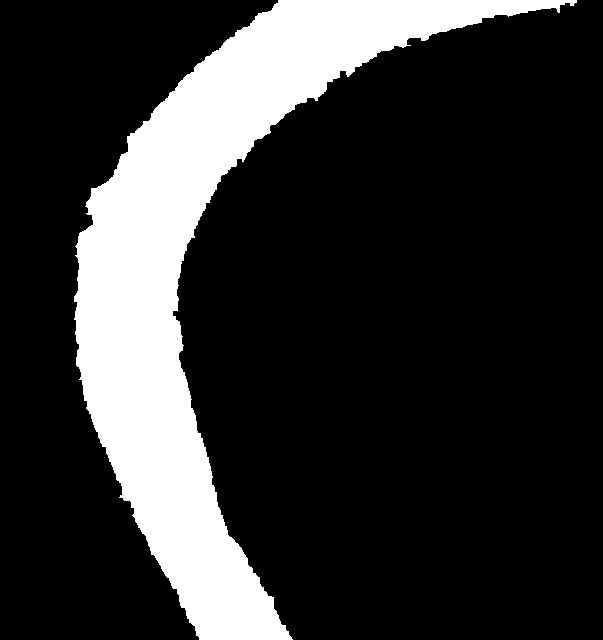

In [ ]:
%matplotlib inline

### BEGIN SOLUTION

### END SOLUTION
plt.figure()
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(river_1,cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
def public_test1():
    try:
        river_1
    except NameError:
        print("[Error] Variable var is not defined.")
        return False

    try:
        seeds
    except NameError:
        print("[Error] Variable seeds is not defined.")
        return False
    
    try:
        len(seeds[0]) == 2
    except:
        print("[Error] The format of seed is wrong.")
        return False
    return True

assert public_test1()

### Task 2:Watershed Transformation
In this task you will use watershed algorithm to segment the river and both riverbanks in the given image. In order to prevent `oversegmentation`, `cv.watershed()` in `OpenCV` implements one of the variants of watershed, non-parametric marker-based segmentation algorithm, described in [paper](https://ieeexplore.ieee.org/document/785528). Therefore, you should choose reasonable marker as parameter of `cv.watershed()`.

Steps:
1. load the image from `'example/image.tif'` and convert it into a RGB image.
2. Use region growing method to segment both riverbanks, save the result in binary image(0 and 255).
3. Using code in the assignment 3, get the middle line of `river_1`, save the result in binary image(0 and 255).
4. Merge the result above into one binary image . 
5. Label the binary image. (Read Hints 1) 
6. Use watershed method to segment `src_img`. Save the result in `river_2`. The label in `river_2` should be 1,2,3 in order for left riverbank, river and right riverbank. The label of boundry should be -1.

Variables:
1. `river_2` : watershed result

Hints:
1. Function [cv.connectedComponents](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#gaedef8c7340499ca391d459122e51bef5) to computes the connected components labeled image of boolean image
2. Function [cv.watershed](https://docs.opencv.org/4.x/d3/d47/group__imgproc__segmentation.html#ga3267243e4d3f95165d55a618c65ac6e1) to use watershed segmentation
3. Check [tutorial 1](https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html) and [tutorial 2](https://docs.opencv.org/4.x/d2/dbd/tutorial_distance_transform.html) to understand how to use `cv.watershed`.

In [ ]:
### BEGIN SOLUTION

### END SOLUTION
plt.figure()
plt.imshow(rgb_img)
plt.imshow(river_2, cmap=plt.cm.Set1_r, alpha=.5)
plt.axis('off')
plt.show()

In [ ]:
def public_test2():
    try:
        river_2
    except NameError:
        print("[Error] Variable river_2 is not defined.")
        return False

    try: 
        assert river_2[70,70] == 1 and river_2[300,120] == 2 and river_2[400,400] == 3
    except: 
        print("[Error] Incorrcet markers number order. The left side should be 1, the river part should be 2, the right part should be 3.")
        return False
    return True

assert public_test2()

### Task 3:Mean Shift Segmentation
In this task you will use mean shift algorithm to segment the picture.

Steps:
1. load the image from `'example/image2.tif'` and convert it into a RGB image.
2. Use mean shift algorithm to segment the loaded picture. (Read hint 1) 

The parameter setting is: 
- spatialRad = 30
- colorRad = 20
- maxPyrLevel = 5

Variables:
1. `result` : result of step 2

Hints:
1. Function [cv.pyrMeanShiftFiltering](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9fabdce9543bd602445f5db3827e4cc0) to do mean shift segmentation

In [ ]:
### BEGIN SOLUTION

### END SOLUTION


plt.figure(figsize=(20, 8), dpi=128)
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(result)
plt.axis('off')
plt.show()

In [ ]:
def public_test3():
    try:
        result
    except NameError:
        print("[Error] Variable result is not defined.")
        return False

    return True

assert public_test3()

### Task 4:Simple Linear Iterative Clustering (SLIC) superpixels algorithm
In this task you will try to create superpixels in the given picture.

Steps:
1. load image from `'example/image2.tif'` and convert it into a RGB image.
2. Initialize superpixels creater on the loaded image. (Read Hint 1)
3. Use `iterate()` function to calculates the superpixel segmentation on a given image with the initialized parameters.
4. Use `enforceLabelConnectivity()` function to enforce label connectivity.
5. Set the counter of superpixels into (255,0,0) on RGB image, save the result as `superpixel_result`.

The parameter setting is: 
- region_size=30
- ruler=10
- min_element_size =20
- num_iterations = 5

Variables:
1. `superpixel_result` : result of step 5

Hints:
1. Function [cv.ximgproc.createSuperpixelSLIC](https://docs.opencv.org/3.4/df/d6c/group__ximgproc__superpixel.html#gacf29df20eaca242645a8d3a2d88e6c06) to create superpixels.
2. Infomation about [SuperpixelSLIC in OpenCV](https://docs.opencv.org/3.4/d3/da9/classcv_1_1ximgproc_1_1SuperpixelSLIC.html)

In [ ]:
### BEGIN SOLUTION

### END SOLUTION


plt.figure()
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [ ]:
def public_test4():
    try:
        superpixel_result
    except NameError:
        print("[Error] Variable superpixel_result is not defined.")
        return False
    
    try:
        (superpixel_result[127,290] == (255,0,0)).all()
    except:
        print("[Error] The pixel (127,290) of superpixel_result should be (255,0,0).")
        return False
    return True

assert public_test4()

### Task 5: Douglas Peuke Algorithm
In this task you will use Douglas Peuke algorithm to approximates a polygonal curve. You will try to 'smooth' the boundary of the Leine River in Hannover.

Steps:
1. load image from `'example/image3.tif'` and convert it into a RGB image and a grayscale image. Create a copy of `rgb_img` as `result_img`.
2. Use region growing method to segment the Leine river with given seeds, (connectivity=1,tolerance=15), save the result in `river_3`
3. Fulfill the river using closing operation with rectangular kernel of size 5x5.
4. find contours of `river_3` with parameter `cv.RETR_EXTERNAL`, `cv.CHAIN_APPROX_SIMPLE`.
5. Use Douglas Peuke algorithm to approximates a polygonal curve of the founded contour (epsilon=4). Save the result in `douglas_peuke_result`.
6. Draw the original contour(green, thickness = 3) on `rgb_img` and the Douglas Peuke result(red, thickness = 3) on `result_img`.

Variables:
1. `douglas_peuke_result` : result of douglas peuke algorithm

Hints:
1. Function [cv.findContours](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) and [cv.drawContours](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc) to find and draw contours.
2. Function [cv.approxPolyDP](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c)

In [ ]:
seeds = [(145,61),(361,240)]

### BEGIN SOLUTION

### END SOLUTION


plt.figure()
plt.subplot(1,2,1)
plt.title('Original Contour')
plt.imshow(rgb_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Douglas Peuke Result')
plt.imshow(result_img)
plt.axis('off')
plt.show()

In [ ]:
def public_test5():
    try:
        douglas_peuke_result
    except NameError:
        print("[Error] Variable douglas_peuke_result is not defined.")
        return False
    
    return True

assert public_test5()

### Task 6: Hough transformation
In this task you will use Hough transformation to detect the four small fountains in the Herrenhausen Gardens of Hannover.


Steps:
1. load image from `'example/image4.tif'` and convert it into a RGB image and a grayscale image.
2. Threshold segment the variable `gray_img` using threshold value 190 and save the result in `binary_img`.
3. Use opening operation with rectangular kernel of size 5x5 to reduce noise in `binary_img`.
4. Use function `cv.findContours()` and `cv.drawContours()` to get the edges of `binary_img` and save the result in `edges`(binary image).
5. Implement hough circle transformation with given `hough_radii` to detect the center of four small fountains. Save the result in `cx`, `cy`.
6. Use `cv.circle()` to draw red circles(thickness=2) in `rgb_img`, indicating the position of founded fountains.

Hints:
1. Function [skimage.transform.hough_circle](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.hough_circle) to implement hough transformation.
2. Function [skimage.transform.hough_circle_peaks](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.hough_circle_peaks) to find the maxima in hough transformation result.
3. Watch [this tutorial](https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html#sphx-glr-auto-examples-edges-plot-circular-elliptical-hough-transform-py) to learn about how to use functions above.

In [ ]:
hough_radii = [36]

### BEGIN SOLUTION

### END SOLUTION


plt.figure(figsize=(16, 8), dpi=96)
plt.subplot(1,2,1)
plt.title('Hough Space')
plt.imshow(hough_result[0])
plt.subplot(1,2,2)
plt.title('Circle Detection Result')
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [ ]:
def public_test6():
    try:
        hough_result
    except NameError:
        print("[Error] Variable hough_result is not defined.")
        return False

    return True

assert public_test6()